In [9]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

from glob import glob

from CASutils import filter_utils as filt
from CASutils import calendar_utils as cal
from CASutils import plotposition_utils as plotpos

importlib.reload(filt)
importlib.reload(cal)

<module 'CASutils.calendar_utils' from '/home/islas/python/CASanalysis/CASutils/calendar_utils.py'>

In [2]:
datadir="/project/cas/islas/python_savs/fluxnet/"
datadircesm="/project/cas/islas/python_savs/snowpaper/DATA_SORT/fluxnetlocs/"
outfile="/project/cas/islas/python_savs/snowpaper/DATA_SORT/trefhtptile_composites/fluxnetcomposites.nc"

In [3]:
# deseasonalize by filtering out the first 4 harmonics of the seasonal cycle and then removing the seasonal mean of each year
def calcdeseas(da):
    datseas = da.groupby('time.dayofyear').mean('time')
    dat4harm = filt.calc_season_nharm(datseas, 4, dimtime=0)
    anoms = da.groupby('time.dayofyear') - dat4harm
    datdeseas = cal.group_season_daily(anoms, 'DJF')
    seasmean = datdeseas.mean('day')
    datdeseas = datdeseas - seasmean
    datdeseas = np.array(datdeseas).flatten()
    return datdeseas

In [6]:
istation='CA-TP1'
fname = datadircesm+'/'+istation+'.nc'
cesmdat = xr.open_dataset(fname)
    
clm5_trefht = calcdeseas(cesmdat.clm5_trefht)
clm5_shflx = calcdeseas(cesmdat.clm5_shflx)
clm5_fgr = calcdeseas(cesmdat.clm5_fgr)
clm5_flns = calcdeseas(cesmdat.clm5_flns)
clm5_fsns = calcdeseas(cesmdat.clm5_fsns)
clm5_lhflx = calcdeseas(cesmdat.clm5_lhflx)
clm5_netrad = clm5_flns - clm5_fsns
        
snowd_trefht = calcdeseas(cesmdat.snowd_trefht)
snowd_shflx = calcdeseas(cesmdat.snowd_shflx)
snowd_fgr = calcdeseas(cesmdat.snowd_fgr)
snowd_flns = calcdeseas(cesmdat.snowd_flns)
snowd_fsns = calcdeseas(cesmdat.snowd_fsns)
snowd_lhflx = calcdeseas(cesmdat.snowd_lhflx)
snowd_netrad = snowd_flns - snowd_fsns

# calculate ptile bin ranges
nblocks=10
binmin = np.empty([nblocks]) ; binmax = np.empty([nblocks])
for iblock in np.arange(0,nblocks,1):
    binmin[iblock] = np.percentile(clm5_trefht,iblock*10)
    binmax[iblock] = np.percentile(clm5_trefht,iblock*10+10)
    if (iblock == 0):
        binmin[iblock] = np.percentile(clm5_trefht,1)
    if (iblock == (nblocks-1)):
        binmax[iblock] = np.percentile(clm5_trefht,99)
            
    
trefhtcomp_clm5 = np.zeros([nblocks])
shflxcomp_clm5 = np.zeros([nblocks])
fgrcomp_clm5 = np.zeros([nblocks])
netradcomp_clm5 = np.zeros([nblocks])
trefhtcomp_snowd = np.zeros([nblocks])
shflxcomp_snowd = np.zeros([nblocks])
fgrcomp_snowd = np.zeros([nblocks])
netradcomp_snowd = np.zeros([nblocks])
trefhtcomp_fnet = np.zeros([nblocks])
shflxcomp_fnet = np.zeros([nblocks])
netradcomp_fnet = np.zeros([nblocks])
        
for iblock in np.arange(0,nblocks,1):
        
    trefhtcomp_clm5[iblock] = (clm5_trefht[ (clm5_trefht >= binmin[iblock]) & (clm5_trefht <binmax[iblock])]).mean()
    shflxcomp_clm5[iblock] = (clm5_shflx[ (clm5_trefht >= binmin[iblock]) & (clm5_trefht < binmax[iblock])]).mean()
    fgrcomp_clm5[iblock] = (clm5_fgr[ (clm5_trefht >= binmin[iblock]) & (clm5_trefht < binmax[iblock])]).mean()
    netradcomp_clm5[iblock] = (clm5_netrad[(clm5_trefht >= binmin[iblock]) & (clm5_trefht < binmax[iblock])]).mean()
        
    trefhtcomp_snowd[iblock] = (snowd_trefht[ (snowd_trefht >= binmin[iblock]) & (snowd_trefht <binmax[iblock])]).mean()
    shflxcomp_snowd[iblock] = (snowd_shflx[ (snowd_trefht >= binmin[iblock]) & (snowd_trefht < binmax[iblock])]).mean()
    fgrcomp_snowd[iblock] = (snowd_fgr[ (snowd_trefht >= binmin[iblock]) & (snowd_trefht < binmax[iblock])]).mean()
    netradcomp_snowd[iblock] = (snowd_netrad[(clm5_trefht >= binmin[iblock]) & (snowd_trefht < binmax[iblock])]).mean()
        
    #trefhtcomp_fnet[iblock] = np.nanmean(fnet_trefht[ (fnet_trefht >= binmin[iblock]) & (fnet_trefht < binmax[iblock])])
    #shflxcomp_fnet[iblock] = np.nanmean(fnet_shflx[ (fnet_trefht >= binmin[iblock]) & (fnet_trefht < binmax[iblock])]) 
    #netradcomp_fnet[iblock] = np.nanmean(fnet_netrad[ (fnet_trefht >= binmin[iblock]) & (fnet_trefht < binmax[iblock])])



/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'lat' has multiple fill values {1e+36, -900.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'lon' has multiple fill values {1e+36, -900.0}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0
nyears=35.0


In [7]:
def plotcomposite(data, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot([0,10],[0,0], color='black')
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    ax.set_xticks(list(np.arange(0,10,1)+0.5))
    ax.set_xlim(0,10)
    ax.set_xticklabels(['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'], rotation=60, ha="right", rotation_mode="anchor")
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlabel('CLM5 percentile bin', fontsize=14)
    ax.set_ylabel(ylabelstr, fontsize=14)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

def oplotcomposite(ax, data, color="darkblue"):
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    return ax

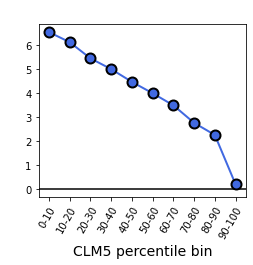

In [16]:
x1, x2, y1, y2 = plotpos.get4by4coords()
fig = plt.figure(figsize=(16,16))
ax = plotcomposite(netradcomp_snowd,' ',
                       ' ',x1[0],x2[0],y1[0],y2[0],color='royalblue')
#ax = oplotcomposite(ax, data.netradcomp_snowd.isel(station=istation),color='darkred')
#ax = oplotcomposite(ax, data.netradcomp_fnet.isel(station=istation), color='forestgreen')

In [ ]:
plt.scatter()